In [103]:
# Requiered libraries
import pandas as pd
import numpy as np
from pathlib import Path
from pandas.tseries.offsets import DateOffset
from fbprophet import Prophet
import hvplot.pandas
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import warnings
warnings.filterwarnings('ignore')

In [104]:
# Read El Salvador excel data into Pandas DataFrame 
elsl_df = pd.read_excel(Path('El_Salvador_Financial_Info.xlsx'), parse_dates=True, index_col='Year')

# Slice the DF so it starts from the year EL Salvador made the USD their currency
elsl_df = elsl_df.loc["2001-01-01" :]
elsl_df.head()

,Inflation Rate,GNI Per Capita (USD),Gini Index,GDP growth (annual %),Population
Year,,,,,
2001-01-01,0.0375,1950000,51.4,0.877319,5927001
2002-01-01,0.0187,2000000,51.9,1.580862,5962139
2003-01-01,0.0212,2130000,50.4,1.562231,5994075
2004-01-01,0.0445,2270000,47.8,0.890786,6023801
2005-01-01,0.0469,2420000,48.5,2.707468,6052124


In [105]:
# Split DataFrame into separate DFs for forecasting with FB Prophet
elsl_inflation = elsl_df['Inflation Rate'] *100
elsl_gni = elsl_df['GNI Per Capita (USD)']
elsl_gini = elsl_df['Gini Index']
elsl_gdp = elsl_df['GDP growth (annual %)']
elsl_population = elsl_df['Population']

In [106]:
# Plot the different dataframes
elsl_inflation.hvplot(title="Average Inflation Rate El Salvador 2001-2020", ylabel="Percentage", xlabel="Year")

:Curve   [Year]   (Inflation Rate)

In [107]:
elsl_gni.hvplot(title="Gross National Income (GNI) El Salvador 2001-2020", ylabel="USD", xlabel="Year").opts(yformatter='$%f')

:Curve   [Year]   (GNI Per Capita (USD))

In [108]:
elsl_gini.hvplot(title="Gini Index El Salvador 2001-2020", ylabel="Index", xlabel="Year")

:Curve   [Year]   (Gini Index)

In [109]:
elsl_gdp.hvplot(title="GDP Growth (annual %) El Salvador 2001-2020", ylabel="Percentage", xlabel="Year")

:Curve   [Year]   (GDP growth (annual %))

In [110]:
elsl_population.hvplot(title="Population El Salvador 2001-2020", ylabel="Population", xlabel="Year").opts(yformatter='%f')

:Curve   [Year]   (Population)

In [111]:
# Create Dfs ready for FB Prophet (change column names)
elsl_inflation_fb = elsl_inflation.reset_index()
elsl_inflation_fb = elsl_inflation_fb.rename(columns = {"Year": "ds", "Inflation Rate": "y"})

elsl_gni_fb = elsl_gni.reset_index()
elsl_gni_fb = elsl_gni_fb.rename(columns = {"Year": "ds", "GNI Per Capita (USD)": "y"})

elsl_gini_fb = elsl_gini.reset_index()
elsl_gini_fb = elsl_gini_fb.rename(columns = {"Year": "ds", "Gini Index": "y"})

elsl_gdp_fb = elsl_gdp.reset_index()
elsl_gdp_fb = elsl_gdp_fb.rename(columns = {"Year": "ds", "GDP growth (annual %)": "y"})

elsl_population_fb = elsl_population.reset_index()
elsl_population_fb = elsl_population_fb.rename(columns = {"Year": "ds", "Population": "y"})

In [112]:
# Create Models for FB Prophet
model_inflation = Prophet()
model_gni = Prophet()
model_gini = Prophet()
model_gdp = Prophet()
model_population = Prophet()

In [113]:
# Fit the models
model_inflation.fit(elsl_inflation_fb)
model_gni.fit(elsl_gni_fb)
model_gini.fit(elsl_gini_fb)
model_gdp.fit(elsl_gdp_fb)
model_population.fit(elsl_population_fb)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 14.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run

In [114]:
# Create data dataframes for 10 years into the future to be used for forecasting
future_inflation = model_inflation.make_future_dataframe(periods=10, freq='y')
future_gni = model_gni.make_future_dataframe(periods=10, freq='y')
future_gini = model_gini.make_future_dataframe(periods=10, freq='y')
future_gdp = model_gdp.make_future_dataframe(periods=10, freq='y')
future_population = model_population.make_future_dataframe(periods=10, freq='y')

In [115]:
# make predictions with Prophet

forecast_inflation = model_inflation.predict(future_inflation)
forecast_gni = model_gni.predict(future_gni)
forecast_gini = model_gini.predict(future_gini)
forecast_gdp = model_gdp.predict(future_gdp)
forecast_population = model_population.predict(future_population)

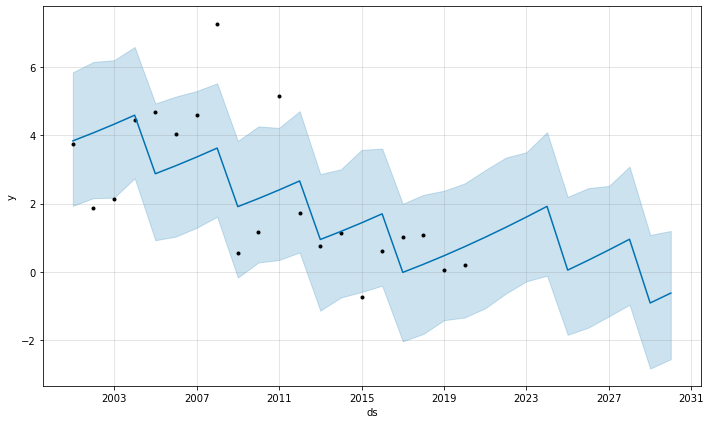

In [116]:
# Plot the predictions
forecast_plot_inflation = model_inflation.plot(forecast_inflation)

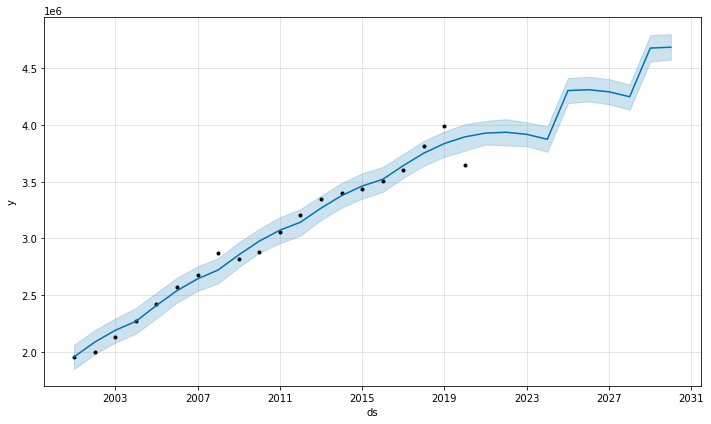

In [117]:
forecast_plot_gni = model_gni.plot(forecast_gni)

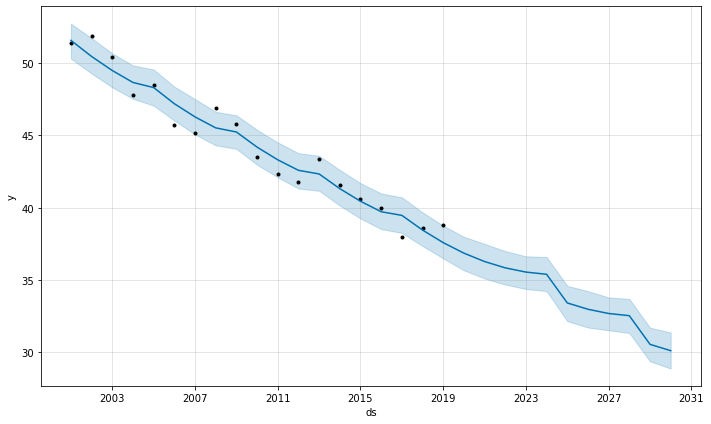

In [118]:
forecast_plot_gini = model_gini.plot(forecast_gini)

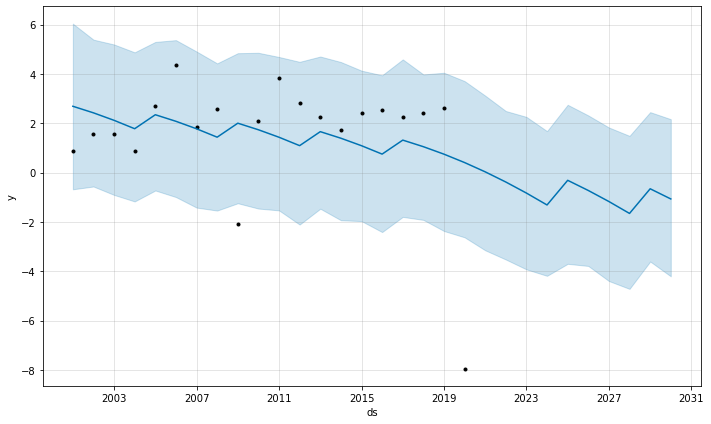

In [119]:
forecast_plot_gdp = model_gdp.plot(forecast_gdp)

In [ ]:
forecast_plot_population = model_population.plot(forecast_populati)